`Customer Segmentation Analysis`

`Challenges for this project`

- `Data Collection`  :   Obtain a dataset containing customer information, purchase history, and relevant data.
- `Data Exploration and Cleaning`  :   Explore the dataset, understand its structure, and handle any missing or inconsistent data.
- `Descriptive Statistics`  :   Calculate key metrics such as average purchase value, frequency of purchases, etc.
- `Customer Segmentation`  :   Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.
- `Visualization`  :   Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.
- `Insights and Recommendations`  :   Analyze characteristics of each segment and provide insights.


In [2]:
# Importing datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the dataset
df = pd.read_csv(r'ifood_df.csv')

In [4]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


`Data Cleaning`

In [5]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
df.index

RangeIndex(start=0, stop=2205, step=1)

In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
# Checking null values
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

`There is no null values in this dataset`

In [9]:
# Checking the duplicated values
df.duplicated().sum()

184

In [10]:
# Shape of the dataset
df.shape

(2205, 39)

In [11]:
# Remove the duplicated values
df.drop_duplicates(inplace=True)

In [12]:
# After removing duplicated now checking duplicates removed or not
df.shape

(2021, 39)

`Now there is no duplicated in this datasets`

In [13]:
# Unique values
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [14]:
# removing unwanted columns
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

In [15]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [16]:
# Statistical Analysis
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


`Exploratory data Analysis`

In [17]:
# checking the correlation
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.540774,0.044418,0.001105,0.724708,0.535848,0.697477,0.549806,0.552832,0.407378,...,-0.004510,0.047589,-0.062488,-0.241868,0.022483,0.025343,0.083590,0.819203,0.813709,0.386264
Kidhome,-0.540774,1.000000,-0.050093,0.020118,-0.506500,-0.374275,-0.446086,-0.389791,-0.376579,-0.352719,...,0.013476,-0.080938,0.018874,0.055667,-0.001837,0.006154,-0.037222,-0.556572,-0.545765,-0.222246
Teenhome,0.044418,-0.050093,1.000000,0.020180,0.003875,-0.178776,-0.266716,-0.199319,-0.164658,-0.017015,...,0.017923,0.041237,-0.057655,-0.117622,-0.022271,0.015267,0.097234,-0.142572,-0.146635,-0.129615
Recency,0.001105,0.020118,0.020180,1.000000,0.011484,-0.012252,0.016184,-0.001318,0.023051,0.011669,...,0.026454,-0.005951,-0.012580,-0.006353,0.029918,-0.024965,-0.002639,0.013583,0.013034,-0.016580
MntWines,0.724708,-0.506500,0.003875,0.011484,1.000000,0.382979,0.587013,0.391603,0.382027,0.388793,...,0.002680,0.043129,-0.093702,-0.139500,-0.063519,0.042088,0.156308,0.900320,0.899770,0.504129
MntFruits,0.535848,-0.374275,-0.178776,-0.012252,0.382979,1.000000,0.567547,0.590591,0.559035,0.397650,...,-0.013175,0.022147,0.023426,-0.060095,0.124698,-0.049594,-0.100364,0.605987,0.592953,0.161660
MntMeatProducts,0.697477,-0.446086,-0.266716,0.016184,0.587013,0.567547,1.000000,0.591345,0.550626,0.369275,...,-0.004804,0.021799,-0.043040,-0.110610,0.070197,-0.000993,-0.013010,0.859909,0.859577,0.317153
MntFishProducts,0.549806,-0.389791,-0.199319,-0.001318,0.391603,0.590591,0.591345,1.000000,0.582989,0.423038,...,0.016258,0.043181,0.051890,-0.057071,0.115776,-0.044861,-0.114751,0.632563,0.618217,0.167190
MntSweetProducts,0.552832,-0.376579,-0.164658,0.023051,0.382027,0.559035,0.550626,0.582989,1.000000,0.360066,...,-0.007453,0.047537,0.060890,-0.055583,0.107790,-0.064249,-0.094401,0.599632,0.589846,0.198419
MntGoldProds,0.407378,-0.352719,-0.017015,0.011669,0.388793,0.397650,0.369275,0.423038,0.360066,1.000000,...,-0.016684,0.047057,0.018399,-0.064580,0.127268,-0.028093,-0.117699,0.461980,0.387133,0.193890


<Axes: >

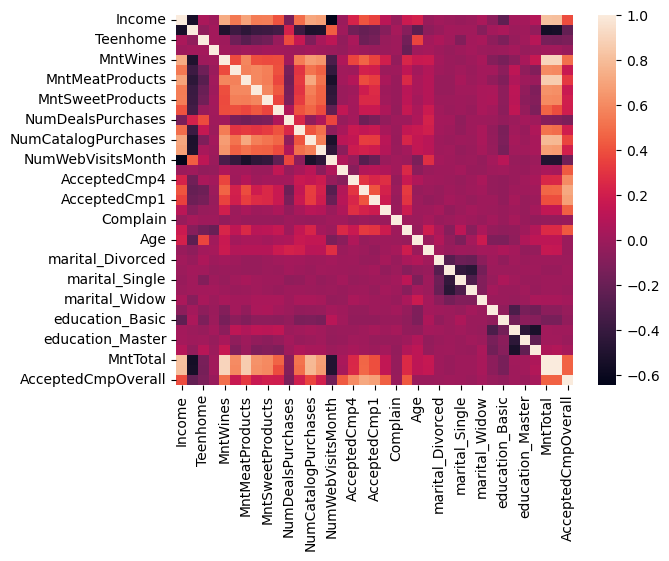

In [18]:
sns.heatmap(df.corr())

<Axes: >

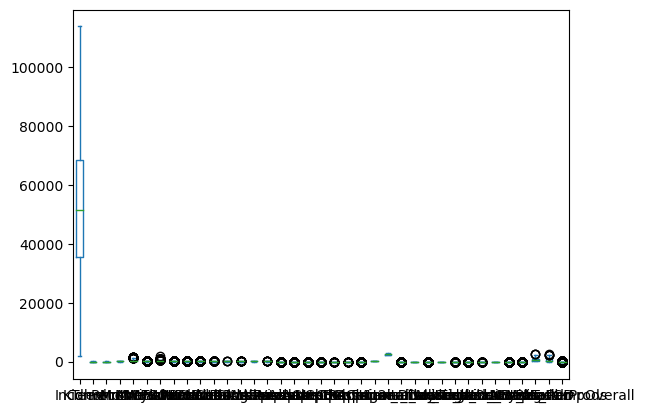

In [19]:
df.plot(kind='box')

`Box plot for the total amount spent on all products (MntTotal)`

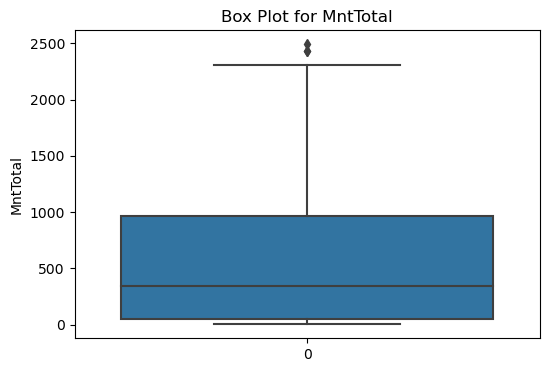

In [20]:
plt.figure(figsize=(6, 4))  
sns.boxplot(df['MntTotal'])
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

`Remove the outliers`

In [21]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [22]:
df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]

In [23]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,51630.820119,0.444004,0.510406,48.893954,305.178394,26.199703,164.996036,37.518335,27.093162,43.875619,...,0.251734,0.034688,0.090684,0.024281,0.502478,0.165015,0.217542,560.985629,517.110010,0.300297
std,20676.523136,0.536322,0.546445,28.964198,336.123164,39.563725,218.284750,54.888293,41.356022,51.690029,...,0.434117,0.183033,0.287230,0.153960,0.500118,0.371286,0.412677,572.595924,550.571315,0.678306
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35395.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51400.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68138.000000,1.000000,1.000000,74.000000,505.000000,33.000000,227.750000,50.000000,33.750000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,882.250000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


`Box plot and histogram`

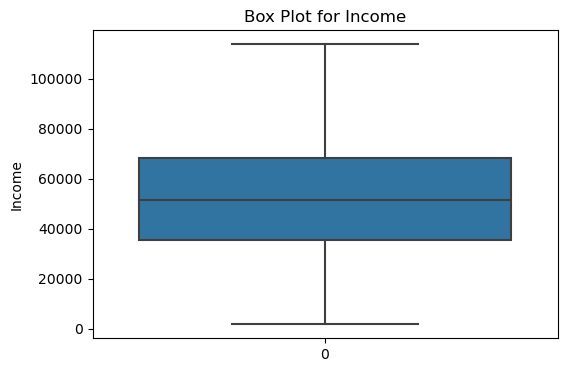

In [24]:
plt.figure(figsize=(6, 4))  
sns.boxplot(df['Income'])
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

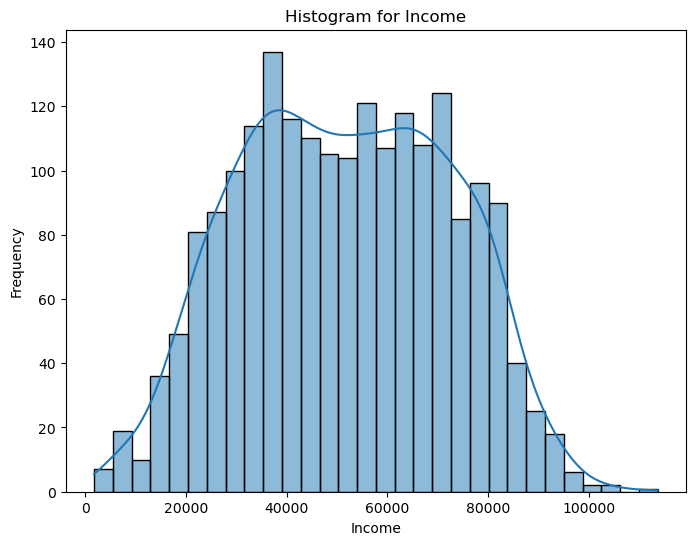

In [25]:
plt.figure(figsize=(8, 6))  
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

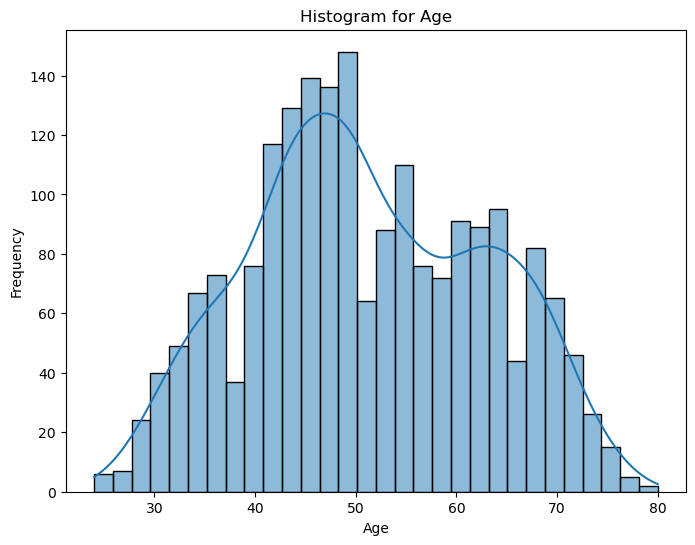

In [26]:
plt.figure(figsize=(8, 6))  
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

`Feature engineering`

In [27]:
# Marital - create a new column 'marital' with values: Divorced, Married, Single, Together, Widow

In [28]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

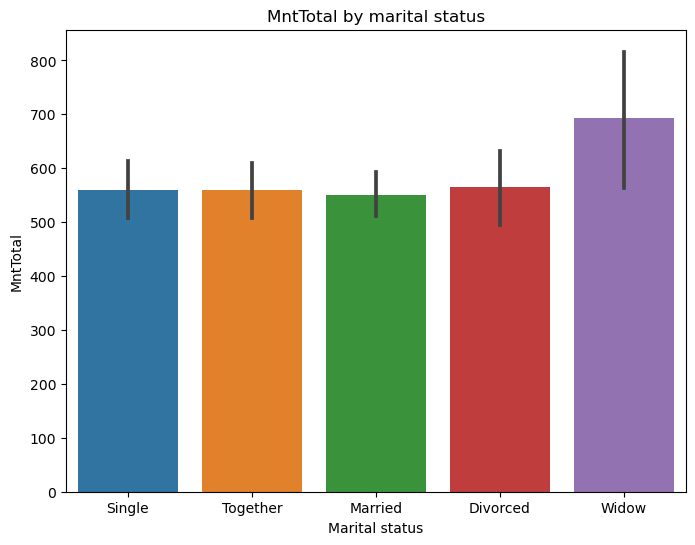

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Marital'], y=df['MntTotal'])
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [30]:
# in_relationship - if a person is in relationship (Together, Married)

In [31]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()  

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


`k means clustering`

In [32]:
# Standardising data

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cols = ['Income', 'MntTotal', 'In_relationship']
df_scaled = df.copy()
df_scaled[cols] = ss.fit_transform(df[cols])

In [34]:
df_scaled[cols].describe()

,Income,MntTotal,In_relationship
count,2.018000e+03,2.018000e+03,2.018000e+03
mean,1.293976e-16,-2.464717e-17,1.936563e-17
std,1.000248e+00,1.000248e+00,1.000248e+00
min,-2.414003e+00,-9.729788e-01,-1.335458e+00
25%,-7.854243e-01,-8.838887e-01,-1.335458e+00
50%,-1.114197e-02,-3.807915e-01,7.488067e-01
75%,7.985516e-01,7.005180e-01,7.488067e-01
max,3.004305e+00,3.044811e+00,7.488067e-01


In [35]:
# PCA - Principal component analysis

In [36]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df_scaled[cols])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

In [37]:
# Elbow method
from sklearn.cluster import KMeans

In [38]:
X = df_scaled[cols]
inertia_list = []
for k in range(2,10):
    inertia = KMeans(n_clusters=k, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

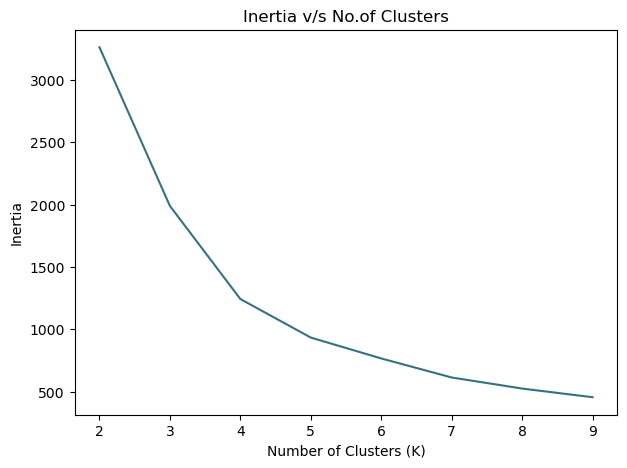

In [39]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia v/s No.of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

`Silhouette score analysis`

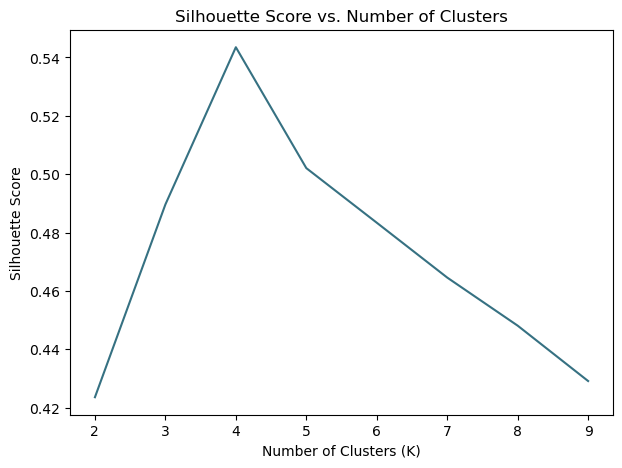

In [40]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [41]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(df_scaled[cols])
df_scaled['Cluster'] = model.predict(df_scaled[cols])

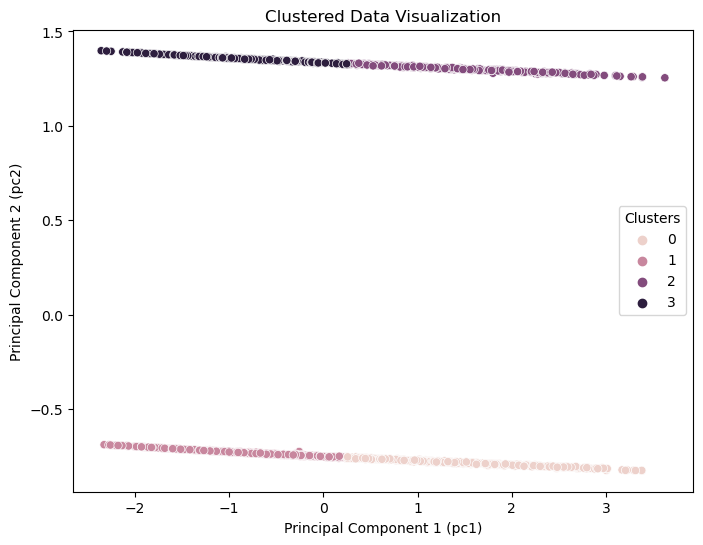

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['pc1'], y=df_scaled['pc2'], hue=df_scaled['Cluster'])
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [43]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[cols].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,71929.712329,1153.931507,1.0
1,38104.595908,161.358056,1.0
2,71956.306931,1160.521452,0.0
3,37522.172986,153.056872,0.0


Text(0, 0.5, 'MntTotal')

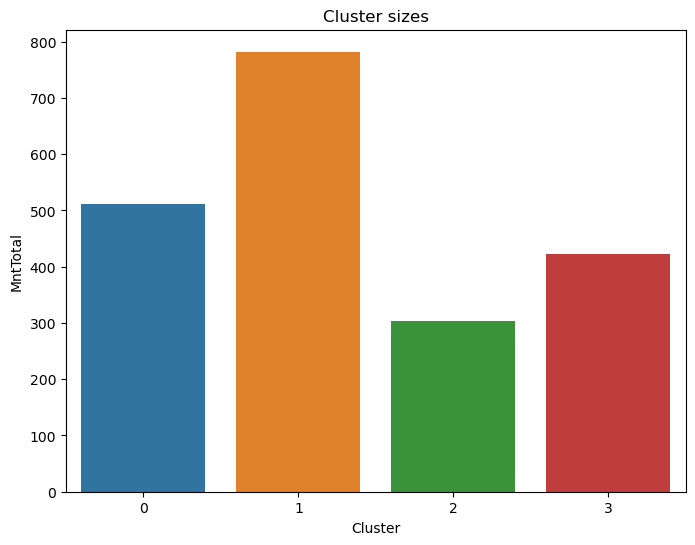

In [44]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_sizes['Cluster'], y=cluster_sizes['MntTotal'])
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [45]:
total_rows = len(df)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,511,25.0
1,1,782,39.0
2,2,303,15.0
3,3,422,21.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


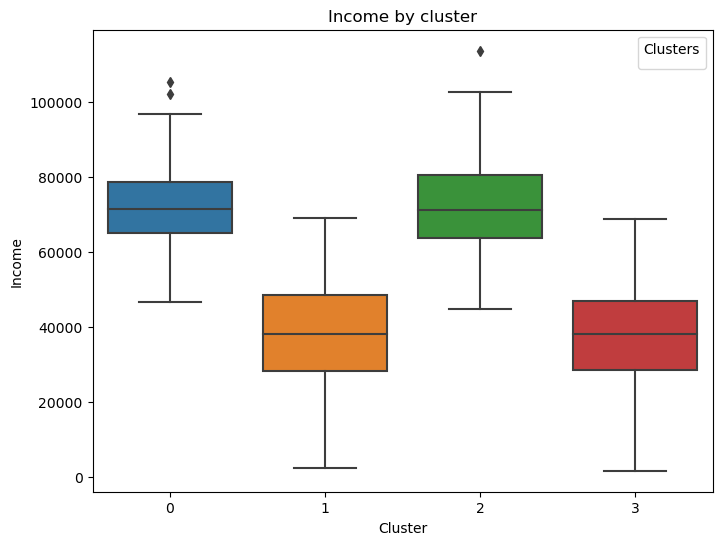

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster'], y=df['Income'])
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

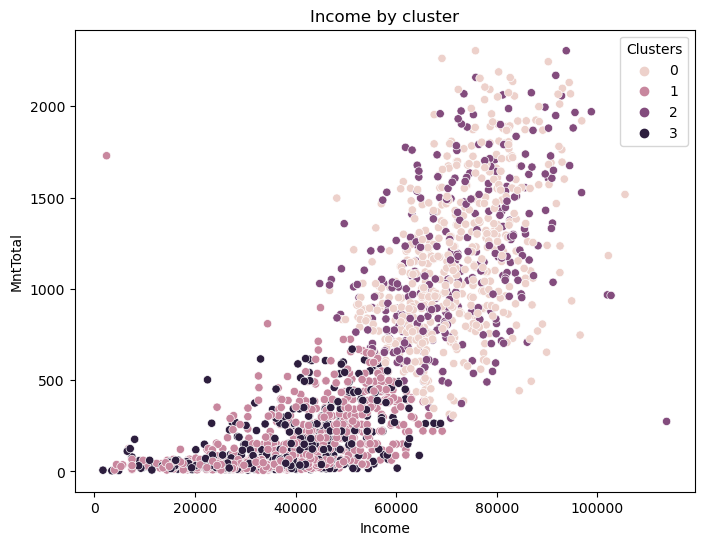

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'])
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Text(0, 0.5, 'In_relationship')

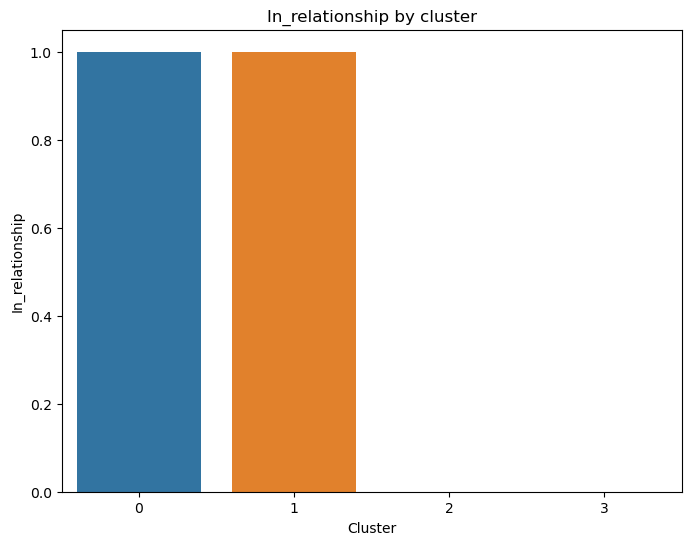

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Cluster'], y=df['In_relationship'])
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')
